In [1]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
from ucimlrepo import fetch_ucirepo
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn import preprocessing

In [2]:
from matplotlib import style 
  
# using the style for the plot 
plt.style.use('ggplot') 

In [3]:
%matplotlib inline

In [4]:
pd.set_option('display.max_columns', None)

https://www.kaggle.com/code/aditimulye/adult-income-dataset-from-scratch
    
99999 in gain - error?

# Loading data

In [34]:
  # fetch dataset 
# adult = fetch_ucirepo(id=2) 
  
# # data (as pandas dataframes) 
# X = adult.data.features 
# y = adult.data.targets 

In [5]:
with open("adult/adult.names") as f:
    print(f.read())

| This data was extracted from the census bureau database found at
| http://www.census.gov/ftp/pub/DES/www/welcome.html
| Donor: Ronny Kohavi and Barry Becker,
|        Data Mining and Visualization
|        Silicon Graphics.
|        e-mail: ronnyk@sgi.com for questions.
| Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).
| 48842 instances, mix of continuous and discrete    (train=32561, test=16281)
| 45222 if instances with unknown values are removed (train=30162, test=15060)
| Duplicate or conflicting instances : 6
| Class probabilities for adult.all file
| Probability for the label '>50K'  : 23.93% / 24.78% (without unknowns)
| Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)
|
| Extraction was done by Barry Becker from the 1994 Census database.  A set of
|   reasonably clean records was extracted using the following conditions:
|   ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))
|
| Prediction task is to determine whether a person makes over

In [6]:
with open("adult/old.adult.names") as f:
    print(f.read())

1. Title of Database: adult
2. Sources:
   (a) Original owners of database (name/phone/snail address/email address)
       US Census Bureau.
   (b) Donor of database (name/phone/snail address/email address)
       Ronny Kohavi and Barry Becker, 
       Data Mining and Visualization
       Silicon Graphics.
       e-mail: ronnyk@sgi.com
   (c) Date received (databases may change over time without name change!)
       05/19/96
3. Past Usage:
   (a) Complete reference of article where it was described/used
        @inproceedings{kohavi-nbtree,
           author={Ron Kohavi},
           title={Scaling Up the Accuracy of Naive-Bayes Classifiers: a 
                  Decision-Tree Hybrid},
           booktitle={Proceedings of the Second International Conference on
                      Knowledge Discovery and Data Mining},
           year = 1996,
           pages={to appear}}
   (b) Indication of what attribute(s) were being predicted 
       Salary greater or less than 50,000.
   (b) Indica

In [5]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

In [8]:
train_data =  pd.read_csv('adult/adult.data', sep=",", names=col_names)
train_data

age          workclass  fnlwgt    education  education_num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital_status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital_gain  capital_loss  hours_per_week  native_country  \
0         Male          2174             0              40   United-States   
1         Male             0             0              13   United-States   
2         Male             0             0              40   United-States   
3         Male             0             0              40   United-States   
4       Female             0             0              40            Cuba   
...        ...           ...           ...             ...             ...   
32556   Female             0             0              38   United-States   
32557     Male             0             0              40   United-States   
32558   Female             0             0              40   United-States   
32559     Male             0             0              20   United-States   
32560   Female         15024             0              40   United-States   

       income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[32561 rows x 15 columns]

In [9]:
test_data =  pd.read_csv('adult/adult.test', sep=",", names=col_names, header=0)
test_data

age      workclass  fnlwgt      education  education_num  \
0       25        Private  226802           11th              7   
1       38        Private   89814        HS-grad              9   
2       28      Local-gov  336951     Assoc-acdm             12   
3       44        Private  160323   Some-college             10   
4       18              ?  103497   Some-college             10   
...    ...            ...     ...            ...            ...   
16276   39        Private  215419      Bachelors             13   
16277   64              ?  321403        HS-grad              9   
16278   38        Private  374983      Bachelors             13   
16279   44        Private   83891      Bachelors             13   
16280   35   Self-emp-inc  182148      Bachelors             13   

            marital_status          occupation     relationship  \
0            Never-married   Machine-op-inspct        Own-child   
1       Married-civ-spouse     Farming-fishing          Husband   
2       Married-civ-spouse     Protective-serv          Husband   
3       Married-civ-spouse   Machine-op-inspct          Husband   
4            Never-married                   ?        Own-child   
...                    ...                 ...              ...   
16276             Divorced      Prof-specialty    Not-in-family   
16277              Widowed                   ?   Other-relative   
16278   Married-civ-spouse      Prof-specialty          Husband   
16279             Divorced        Adm-clerical        Own-child   
16280   Married-civ-spouse     Exec-managerial          Husband   

                      race      sex  capital_gain  capital_loss  \
0                    Black     Male             0             0   
1                    White     Male             0             0   
2                    White     Male             0             0   
3                    Black     Male          7688             0   
4                    White   Female             0             0   
...                    ...      ...           ...           ...   
16276                White   Female             0             0   
16277                Black     Male             0             0   
16278                White     Male             0             0   
16279   Asian-Pac-Islander     Male          5455             0   
16280                White     Male             0             0   

       hours_per_week  native_country   income  
0                  40   United-States   <=50K.  
1                  50   United-States   <=50K.  
2                  40   United-States    >50K.  
3                  40   United-States    >50K.  
4                  30   United-States   <=50K.  
...               ...             ...      ...  
16276              36   United-States   <=50K.  
16277              40   United-States   <=50K.  
16278              50   United-States   <=50K.  
16279              40   United-States   <=50K.  
16280              60   United-States    >50K.  

[16281 rows x 15 columns]

In [31]:
df = pd.concat([train_data, test_data])

In [11]:
df = df.reset_index(drop=True)
df

age          workclass  fnlwgt   education  education_num  \
0       39          State-gov   77516   Bachelors             13   
1       50   Self-emp-not-inc   83311   Bachelors             13   
2       38            Private  215646     HS-grad              9   
3       53            Private  234721        11th              7   
4       28            Private  338409   Bachelors             13   
...    ...                ...     ...         ...            ...   
48837   39            Private  215419   Bachelors             13   
48838   64                  ?  321403     HS-grad              9   
48839   38            Private  374983   Bachelors             13   
48840   44            Private   83891   Bachelors             13   
48841   35       Self-emp-inc  182148   Bachelors             13   

            marital_status          occupation     relationship  \
0            Never-married        Adm-clerical    Not-in-family   
1       Married-civ-spouse     Exec-managerial          Husband   
2                 Divorced   Handlers-cleaners    Not-in-family   
3       Married-civ-spouse   Handlers-cleaners          Husband   
4       Married-civ-spouse      Prof-specialty             Wife   
...                    ...                 ...              ...   
48837             Divorced      Prof-specialty    Not-in-family   
48838              Widowed                   ?   Other-relative   
48839   Married-civ-spouse      Prof-specialty          Husband   
48840             Divorced        Adm-clerical        Own-child   
48841   Married-civ-spouse     Exec-managerial          Husband   

                      race      sex  capital_gain  capital_loss  \
0                    White     Male          2174             0   
1                    White     Male             0             0   
2                    White     Male             0             0   
3                    Black     Male             0             0   
4                    Black   Female             0             0   
...                    ...      ...           ...           ...   
48837                White   Female             0             0   
48838                Black     Male             0             0   
48839                White     Male             0             0   
48840   Asian-Pac-Islander     Male          5455             0   
48841                White     Male             0             0   

       hours_per_week  native_country   income  
0                  40   United-States    <=50K  
1                  13   United-States    <=50K  
2                  40   United-States    <=50K  
3                  40   United-States    <=50K  
4                  40            Cuba    <=50K  
...               ...             ...      ...  
48837              36   United-States   <=50K.  
48838              40   United-States   <=50K.  
48839              50   United-States   <=50K.  
48840              40   United-States   <=50K.  
48841              60   United-States    >50K.  

[48842 rows x 15 columns]

In [12]:
# metadata 
# print(adult.metadata) 

In [5]:
# variable information according to the dataset description
# adult.variables

name     role         type      demographic  \
0              age  Feature      Integer              Age   
1        workclass  Feature  Categorical           Income   
2           fnlwgt  Feature      Integer             None   
3        education  Feature  Categorical  Education Level   
4    education-num  Feature      Integer  Education Level   
5   marital-status  Feature  Categorical            Other   
6       occupation  Feature  Categorical            Other   
7     relationship  Feature  Categorical            Other   
8             race  Feature  Categorical             Race   
9              sex  Feature       Binary              Sex   
10    capital-gain  Feature      Integer             None   
11    capital-loss  Feature      Integer             None   
12  hours-per-week  Feature      Integer             None   
13  native-country  Feature  Categorical            Other   
14          income   Target       Binary           Income   

                                          description units missing_values  
0                                                 N/A  None             no  
1   Private, Self-emp-not-inc, Self-emp-inc, Feder...  None            yes  
2                                                None  None             no  
3    Bachelors, Some-college, 11th, HS-grad, Prof-...  None             no  
4                                                None  None             no  
5   Married-civ-spouse, Divorced, Never-married, S...  None             no  
6   Tech-support, Craft-repair, Other-service, Sal...  None            yes  
7   Wife, Own-child, Husband, Not-in-family, Other...  None             no  
8   White, Asian-Pac-Islander, Amer-Indian-Eskimo,...  None             no  
9                                       Female, Male.  None             no  
10                                               None  None             no  
11                                               None  None             no  
12                                               None  None             no  
13  United-States, Cambodia, England, Puerto-Rico,...  None            yes  
14                                       >50K, <=50K.  None             no

In [4]:
# df = X.copy()
# df['income'] = y

## Automative EDA using pandas_profiling (ydata_profiling)

In [27]:
# before cleaning
profile = ProfileReport(df, title="Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [29]:
profile = ProfileReport(df, title="Raw Dataset Analysis", explorative=True)
profile.to_file("report.html") # before cleaning

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# General info

In [14]:
df.duplicated().sum()  # natural

29

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


We have 48842 records in the dataset and 15 columns, all columns have the proper type. 
Suprisingly we see that there is no missing values in out dataset. 
However it is not true, since missing values as encoded with "?"

In [16]:
df.tail()

age      workclass  fnlwgt   education  education_num  \
48837   39        Private  215419   Bachelors             13   
48838   64              ?  321403     HS-grad              9   
48839   38        Private  374983   Bachelors             13   
48840   44        Private   83891   Bachelors             13   
48841   35   Self-emp-inc  182148   Bachelors             13   

            marital_status        occupation     relationship  \
48837             Divorced    Prof-specialty    Not-in-family   
48838              Widowed                 ?   Other-relative   
48839   Married-civ-spouse    Prof-specialty          Husband   
48840             Divorced      Adm-clerical        Own-child   
48841   Married-civ-spouse   Exec-managerial          Husband   

                      race      sex  capital_gain  capital_loss  \
48837                White   Female             0             0   
48838                Black     Male             0             0   
48839                White     Male             0             0   
48840   Asian-Pac-Islander     Male          5455             0   
48841                White     Male             0             0   

       hours_per_week  native_country   income  
48837              36   United-States   <=50K.  
48838              40   United-States   <=50K.  
48839              50   United-States   <=50K.  
48840              40   United-States   <=50K.  
48841              60   United-States    >50K.

In [17]:
df.iloc[48838]['workclass']

' ?'

# Missing values

### Removing extra white spaces and changing '?' to Null values

In [32]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [33]:
for col in categorical_columns:
    df[col] = df[col].str.strip()

In [34]:
df = df.replace('?', np.nan, regex=False)

In [35]:
df.tail()

age     workclass  fnlwgt  education  education_num  \
16276   39       Private  215419  Bachelors             13   
16277   64           NaN  321403    HS-grad              9   
16278   38       Private  374983  Bachelors             13   
16279   44       Private   83891  Bachelors             13   
16280   35  Self-emp-inc  182148  Bachelors             13   

           marital_status       occupation    relationship  \
16276            Divorced   Prof-specialty   Not-in-family   
16277             Widowed              NaN  Other-relative   
16278  Married-civ-spouse   Prof-specialty         Husband   
16279            Divorced     Adm-clerical       Own-child   
16280  Married-civ-spouse  Exec-managerial         Husband   

                     race     sex  capital_gain  capital_loss  hours_per_week  \
16276               White  Female             0             0              36   
16277               Black    Male             0             0              40   
16278               White    Male             0             0              50   
16279  Asian-Pac-Islander    Male          5455             0              40   
16280               White    Male             0             0              60   

      native_country  income  
16276  United-States  <=50K.  
16277  United-States  <=50K.  
16278  United-States  <=50K.  
16279  United-States  <=50K.  
16280  United-States   >50K.

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  47985 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [17]:
df.isnull().sum() 

age                  0
workclass         2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
income               0
dtype: int64

In [18]:
len(df.loc[(df['occupation'].isnull()) & ((df['workclass'].isnull()))])

2799

workclass is missing -> occupation is also missing

In [170]:
profile = ProfileReport(df, title="Dataset with NULLs", explorative=True)
profile.to_file("report_with_nulls.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

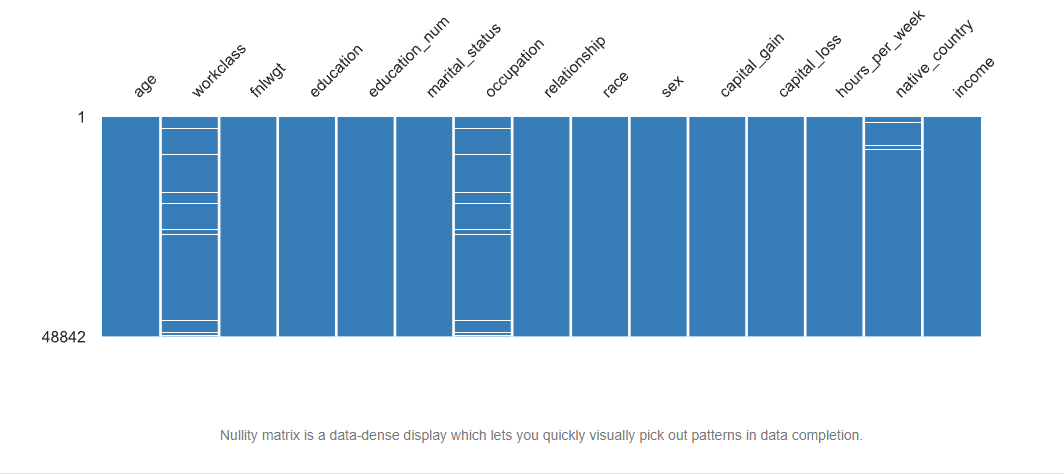

Since the are not so mamy missing values and  inputing them won't be that easy we will just simply delete them. 

In [37]:
df = df.dropna()
df

age         workclass  fnlwgt  education  education_num  \
0       39         State-gov   77516  Bachelors             13   
1       50  Self-emp-not-inc   83311  Bachelors             13   
2       38           Private  215646    HS-grad              9   
3       53           Private  234721       11th              7   
4       28           Private  338409  Bachelors             13   
...    ...               ...     ...        ...            ...   
16275   33           Private  245211  Bachelors             13   
16276   39           Private  215419  Bachelors             13   
16278   38           Private  374983  Bachelors             13   
16279   44           Private   83891  Bachelors             13   
16280   35      Self-emp-inc  182148  Bachelors             13   

           marital_status         occupation   relationship  \
0           Never-married       Adm-clerical  Not-in-family   
1      Married-civ-spouse    Exec-managerial        Husband   
2                Divorced  Handlers-cleaners  Not-in-family   
3      Married-civ-spouse  Handlers-cleaners        Husband   
4      Married-civ-spouse     Prof-specialty           Wife   
...                   ...                ...            ...   
16275       Never-married     Prof-specialty      Own-child   
16276            Divorced     Prof-specialty  Not-in-family   
16278  Married-civ-spouse     Prof-specialty        Husband   
16279            Divorced       Adm-clerical      Own-child   
16280  Married-civ-spouse    Exec-managerial        Husband   

                     race     sex  capital_gain  capital_loss  hours_per_week  \
0                   White    Male          2174             0              40   
1                   White    Male             0             0              13   
2                   White    Male             0             0              40   
3                   Black    Male             0             0              40   
4                   Black  Female             0             0              40   
...                   ...     ...           ...           ...             ...   
16275               White    Male             0             0              40   
16276               White  Female             0             0              36   
16278               White    Male             0             0              50   
16279  Asian-Pac-Islander    Male          5455             0              40   
16280               White    Male             0             0              60   

      native_country  income  
0      United-States   <=50K  
1      United-States   <=50K  
2      United-States   <=50K  
3      United-States   <=50K  
4               Cuba   <=50K  
...              ...     ...  
16275  United-States  <=50K.  
16276  United-States  <=50K.  
16278  United-States  <=50K.  
16279  United-States  <=50K.  
16280  United-States   >50K.  

[45222 rows x 15 columns]

# Data consistancy 

In [38]:
df.groupby(['income'])['age'].count()

income
<=50K     22654
<=50K.    11360
>50K       7508
>50K.      3700
Name: age, dtype: int64

In [39]:
df['income'] = df['income'].str.replace('.', '', regex=False)

In [40]:
df.groupby(['income'])['age'].count()

income
<=50K    34014
>50K     11208
Name: age, dtype: int64

In [41]:
df.groupby(['relationship', 'sex'])['age'].count()

relationship    sex   
Husband         Female        1
                Male      18665
Not-in-family   Female     5412
                Male       6290
Other-relative  Female      610
                Male        739
Own-child       Female     2929
                Male       3697
Unmarried       Female     3653
                Male       1135
Wife            Female     2090
                Male          1
Name: age, dtype: int64

In [42]:
incorrect_index_husb = df[(df['relationship'] == 'Husband') & (df['sex'] == 'Female')].index
incorrect_index_wife = df[(df['relationship'] == 'Wife') & (df['sex'] == 'Male')].index

df = df.drop(index=incorrect_index_husb)
df = df.drop(index=incorrect_index_wife)

In [43]:
df.groupby(['relationship', 'sex'])['age'].count()

relationship    sex   
Husband         Male      18665
Not-in-family   Female     5412
                Male       6290
Other-relative  Female      610
                Male        739
Own-child       Female     2928
                Male       3697
Unmarried       Female     3653
                Male       1135
Wife            Female     2089
Name: age, dtype: int64

In [26]:
profile = ProfileReport(df, title="Clean Data Analysis", explorative=True)
profile.to_file("report_clean.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Categorical (not numeric) variables

In [63]:
df

age         workclass  fnlwgt  education  education_num  \
0       39         State-gov   77516  Bachelors             13   
1       50  Self-emp-not-inc   83311  Bachelors             13   
2       38           Private  215646    HS-grad              9   
3       53           Private  234721       11th              7   
4       28           Private  338409  Bachelors             13   
...    ...               ...     ...        ...            ...   
48836   33           Private  245211  Bachelors             13   
48837   39           Private  215419  Bachelors             13   
48839   38           Private  374983  Bachelors             13   
48840   44           Private   83891  Bachelors             13   
48841   35      Self-emp-inc  182148  Bachelors             13   

           marital_status         occupation   relationship  \
0           Never-married       Adm-clerical  Not-in-family   
1      Married-civ-spouse    Exec-managerial        Husband   
2                Divorced  Handlers-cleaners  Not-in-family   
3      Married-civ-spouse  Handlers-cleaners        Husband   
4      Married-civ-spouse     Prof-specialty           Wife   
...                   ...                ...            ...   
48836       Never-married     Prof-specialty      Own-child   
48837            Divorced     Prof-specialty  Not-in-family   
48839  Married-civ-spouse     Prof-specialty        Husband   
48840            Divorced       Adm-clerical      Own-child   
48841  Married-civ-spouse    Exec-managerial        Husband   

                     race     sex  capital_gain  capital_loss  hours_per_week  \
0                   White    Male          2174             0              40   
1                   White    Male             0             0              13   
2                   White    Male             0             0              40   
3                   Black    Male             0             0              40   
4                   Black  Female             0             0              40   
...                   ...     ...           ...           ...             ...   
48836               White    Male             0             0              40   
48837               White  Female             0             0              36   
48839               White    Male             0             0              50   
48840  Asian-Pac-Islander    Male          5455             0              40   
48841               White    Male             0             0              60   

      native_country income  
0      United-States  <=50K  
1      United-States  <=50K  
2      United-States  <=50K  
3      United-States  <=50K  
4               Cuba  <=50K  
...              ...    ...  
48836  United-States  <=50K  
48837  United-States  <=50K  
48839  United-States  <=50K  
48840  United-States  <=50K  
48841  United-States   >50K  

[45220 rows x 15 columns]

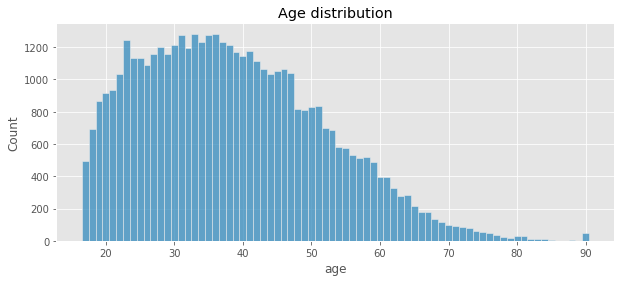

In [64]:
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x='age', discrete=True)
plt.title('Age distribution')
plt.savefig('img/age_distr.pdf')
plt.show()

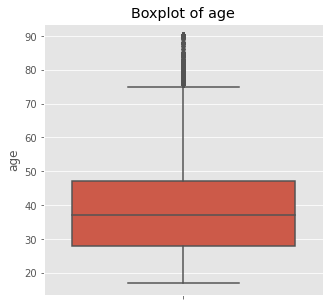

In [65]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=df, y='age')
plt.title('Boxplot of age')
plt.savefig('img/age_box.pdf')

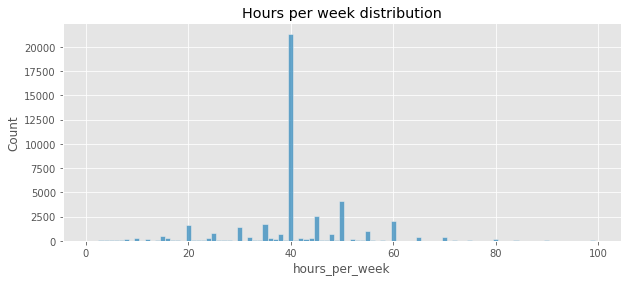

In [66]:
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x='hours_per_week', discrete=True)
plt.title('Hours per week distribution')
plt.savefig('img/h_per_week_distr.pdf')
plt.show()

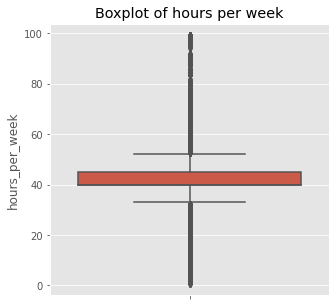

In [67]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=df, y='hours_per_week')
plt.title('Boxplot of hours per week')
plt.savefig('img/h_per_week_box.pdf')

In [68]:
categorical_columns

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

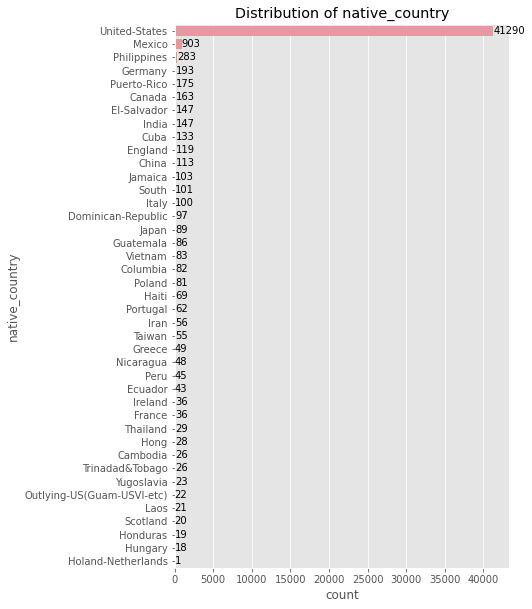

In [81]:
plt.figure(figsize=(6, 10))
ax = sns.countplot(data=df, y='native_country', order=df['native_country'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.title('Distribution of native_country')
plt.savefig('img/country_distr.pdf', bbox_inches='tight')
plt.show()

In [44]:
df['from_USA'] = np.where(df['native_country'] == 'United-States', 1, 0)

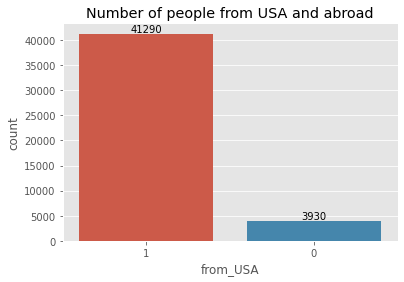

In [73]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='from_USA', order=df['from_USA'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.title('Number of people from USA and abroad')
plt.savefig('img/from_USA_distr.pdf')
plt.show()

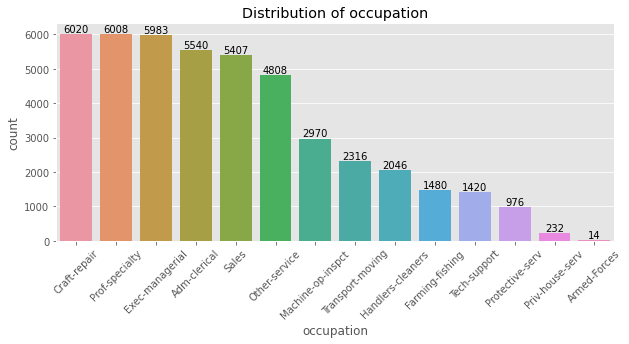

In [80]:
plt.figure(figsize=(10, 4))
ax = sns.countplot(data=df, x='occupation', order=df['occupation'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.title('Distribution of occupation')
plt.savefig('img/occupation_distr.pdf', bbox_inches='tight')
plt.show()

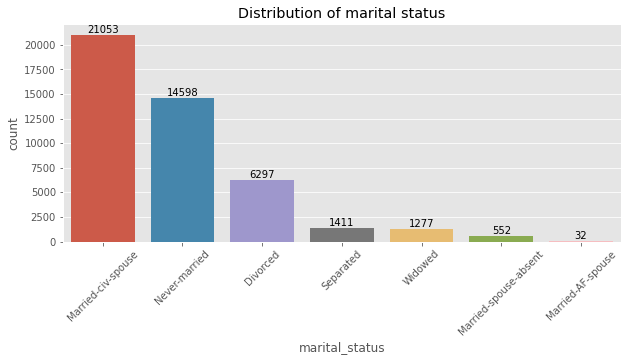

In [83]:
plt.figure(figsize=(10, 4))
ax = sns.countplot(data=df, x='marital_status', order=df['marital_status'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.title('Distribution of marital status')
plt.savefig('img/marital_status_distr.pdf', bbox_inches='tight')
plt.show()

In [76]:
cols = ['workclass',
 'education', 
 'education_num',
 'marital_status',
 'relationship',
 'race',
 'sex',
 'income']

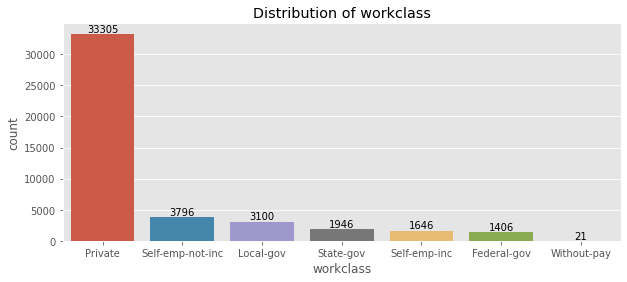

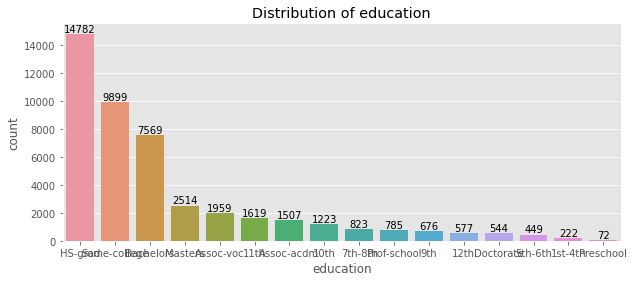

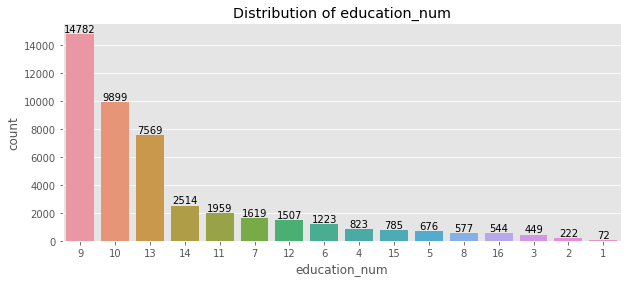

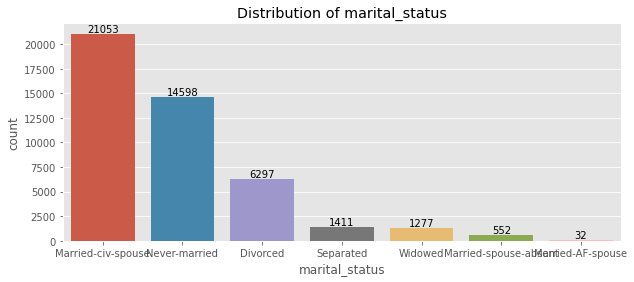

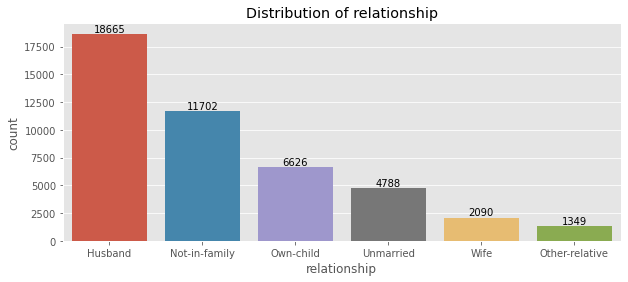

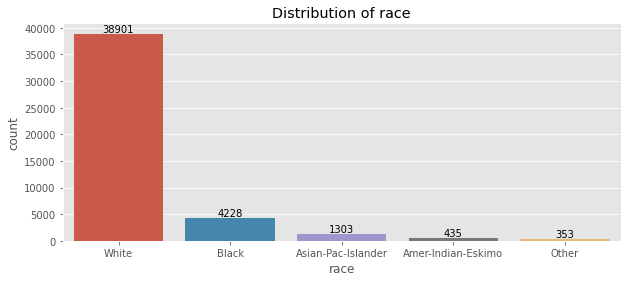

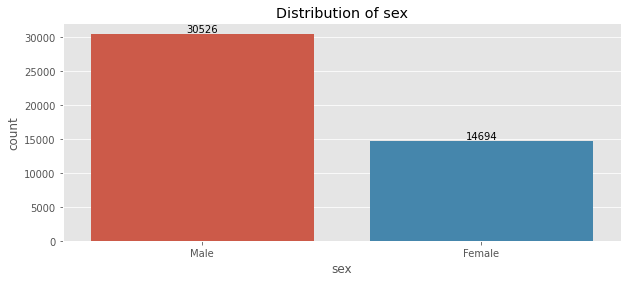

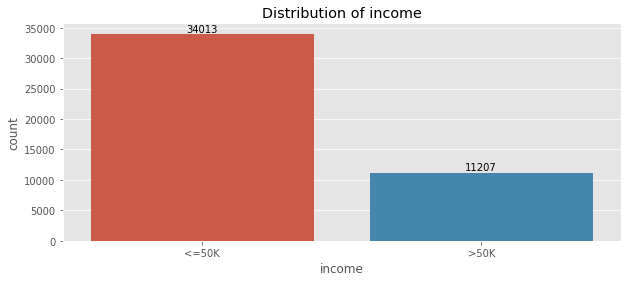

In [82]:
for col in cols:
    plt.figure(figsize=(10, 4))
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    ax.bar_label(ax.containers[0])
    plt.title(f'Distribution of {col}')
    plt.savefig(f'img/{col}_distr.pdf', bbox_inches='tight')
    plt.show()

**We will delete columns: 'education' because it has the same information as 'education_num', as well as 'native_country' because we created new column 'from_USA'**

In [45]:
df = df.drop(['education'], axis=1)
df = df.drop(['native_country'], axis=1)

In [85]:
profile = ProfileReport(df, title="Clean Data Analysis", explorative=True)
profile.to_file("report_clean_drop.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Continous features

In [190]:
# fnlwgt - Final Weight (the number of people the census believes the entry represents) 

In [86]:
df[['age', 'capital_gain', 'capital_loss', 'hours_per_week']].describe()

age  capital_gain  capital_loss  hours_per_week
count  45220.000000  45220.000000  45220.000000    45220.000000
mean      38.548253   1101.479058     88.599337       40.938058
std       13.218069   7506.592509    404.964619       12.007772
min       17.000000      0.000000      0.000000        1.000000
25%       28.000000      0.000000      0.000000       40.000000
50%       37.000000      0.000000      0.000000       40.000000
75%       47.000000      0.000000      0.000000       45.000000
max       90.000000  99999.000000   4356.000000       99.000000

In [87]:
num_columns = ['fnlwgt', 'capital_gain', 'capital_loss']

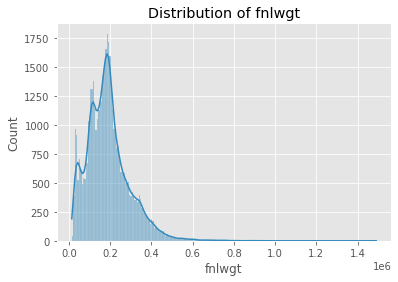

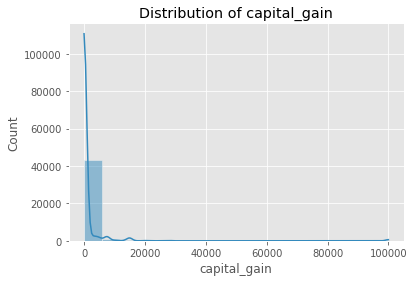

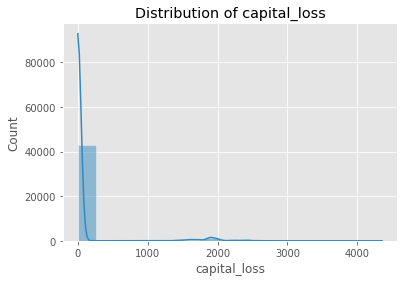

In [89]:
for fea in num_columns:
    plt.figure(figsize=(6, 4))
    ax = sns.histplot(data=df, x=fea, kde=True)
    plt.title(f'Distribution of {fea}')
    plt.savefig(f'img/{fea}_distr.pdf', bbox_inches='tight')
    plt.show()

# Correlation

In [90]:
df.corr(method='pearson', numeric_only=True)

age    fnlwgt  education_num  capital_gain  capital_loss  \
age             1.000000 -0.075771       0.037639      0.079680      0.059346   
fnlwgt         -0.075771  1.000000      -0.042034     -0.004106     -0.004342   
education_num   0.037639 -0.042034       1.000000      0.126911      0.081716   
capital_gain    0.079680 -0.004106       0.126911      1.000000     -0.032104   
capital_loss    0.059346 -0.004342       0.081716     -0.032104      1.000000   
hours_per_week  0.101991 -0.018677       0.146210      0.083880      0.054194   
from_USA        0.012090 -0.076471       0.132240      0.010940      0.011769   

                hours_per_week  from_USA  
age                   0.101991  0.012090  
fnlwgt               -0.018677 -0.076471  
education_num         0.146210  0.132240  
capital_gain          0.083880  0.010940  
capital_loss          0.054194  0.011769  
hours_per_week        1.000000  0.010229  
from_USA              0.010229  1.000000

In [91]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
categorical_columns += ['from_USA']
categorical_columns

['workclass',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'income',
 'from_USA']

In [414]:
categorical_corr = np.zeros((len(categorical_columns), len(categorical_columns)))
for i in range(len(categorical_columns)):
    for j in range(len(categorical_columns)):
        crosstab_result = pd.crosstab(index=df[categorical_columns[i]], columns=df[categorical_columns[j]])
        test_result = chi2_contingency(crosstab_result)
        categorical_corr[i, j] = test_result[1]

In [415]:
categorical_corr <= 0.05

array([[ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True, False],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True, False,  True,  True]])

In [337]:
categorical_columns

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'income',
 'from_USA']

H0: The variables are not correlated with each other. This is the H0 used in the Chi-square test.

If P-value came smaller than 0.05, we rejecte H0. Which means the variables are correlated with each other.
 
Only 'from_USA' in not correlated with 'race'. Other categorical features are correlated.

### Transforming non-numerical labels to numerical labels:

In [92]:
df_encod = df.copy()

In [93]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

In [94]:
for cat_col in categorical_columns:
    le = preprocessing.LabelEncoder()
    le.fit(df[cat_col])
    df_encod[cat_col] = le.transform(df[cat_col])
    
    print(cat_col)
    labels = dict(zip(le.classes_, le.transform(le.classes_)))
    print(labels)
    print('-' * 50)

workclass
{'Federal-gov': 0, 'Local-gov': 1, 'Private': 2, 'Self-emp-inc': 3, 'Self-emp-not-inc': 4, 'State-gov': 5, 'Without-pay': 6}
--------------------------------------------------
marital_status
{'Divorced': 0, 'Married-AF-spouse': 1, 'Married-civ-spouse': 2, 'Married-spouse-absent': 3, 'Never-married': 4, 'Separated': 5, 'Widowed': 6}
--------------------------------------------------
occupation
{'Adm-clerical': 0, 'Armed-Forces': 1, 'Craft-repair': 2, 'Exec-managerial': 3, 'Farming-fishing': 4, 'Handlers-cleaners': 5, 'Machine-op-inspct': 6, 'Other-service': 7, 'Priv-house-serv': 8, 'Prof-specialty': 9, 'Protective-serv': 10, 'Sales': 11, 'Tech-support': 12, 'Transport-moving': 13}
--------------------------------------------------
relationship
{'Husband': 0, 'Not-in-family': 1, 'Other-relative': 2, 'Own-child': 3, 'Unmarried': 4, 'Wife': 5}
--------------------------------------------------
race
{'Amer-Indian-Eskimo': 0, 'Asian-Pac-Islander': 1, 'Black': 2, 'Other': 3, 'White'

In [95]:
corr_matrix_p = df_encod.corr(method='pearson')

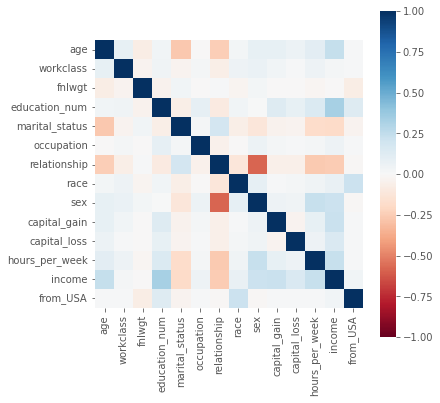

In [98]:
plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix_p, 
            xticklabels=corr_matrix_p.columns.values,
            yticklabels=corr_matrix_p.columns.values,
            square=True, cmap='RdBu', vmin=-1, vmax=1)
plt.savefig(f'img/corr_matrix.pdf', bbox_inches='tight')

In [99]:
corr_matrix_p

age  workclass    fnlwgt  education_num  marital_status  \
age             1.000000   0.085887 -0.075771       0.037639       -0.271635   
workclass       0.085887   1.000000 -0.034964       0.040782       -0.033225   
fnlwgt         -0.075771  -0.034964  1.000000      -0.042034        0.033109   
education_num   0.037639   0.040782 -0.042034       1.000000       -0.064981   
marital_status -0.271635  -0.033225  0.033109      -0.064981        1.000000   
occupation     -0.004476   0.017511 -0.002008       0.089720        0.016404   
relationship   -0.247553  -0.065047  0.009831      -0.088503        0.180460   
race            0.023786   0.049769 -0.029200       0.031649       -0.070296   
sex             0.082056   0.069637  0.027214       0.003386       -0.120018   
capital_gain    0.079680   0.034541 -0.004106       0.126911       -0.042402   
capital_loss    0.059346   0.008231 -0.004342       0.081716       -0.034824   
hours_per_week  0.101991   0.051365 -0.018677       0.146210       -0.183180   
income          0.237074   0.015665 -0.007325       0.332769       -0.192708   
from_USA        0.012090   0.009072 -0.076471       0.132240       -0.032968   

                occupation  relationship      race       sex  capital_gain  \
age              -0.004476     -0.247553  0.023786  0.082056      0.079680   
workclass         0.017511     -0.065047  0.049769  0.069637      0.034541   
fnlwgt           -0.002008      0.009831 -0.029200  0.027214     -0.004106   
education_num     0.089720     -0.088503  0.031649  0.003386      0.126911   
marital_status    0.016404      0.180460 -0.070296 -0.120018     -0.042402   
occupation        1.000000     -0.051588 -0.000030  0.056679      0.019437   
relationship     -0.051588      1.000000 -0.118604 -0.583091     -0.056817   
race             -0.000030     -0.118604  1.000000  0.088944      0.014080   
sex               0.056679     -0.583091  0.088944  1.000000      0.047443   
capital_gain      0.019437     -0.056817  0.014080  0.047443      1.000000   
capital_loss      0.015270     -0.058422  0.020958  0.046455     -0.032104   
hours_per_week    0.016161     -0.259209  0.044740  0.231430      0.083880   
income            0.049835     -0.253526  0.070837  0.215730      0.221046   
from_USA          0.008603     -0.012548  0.211966 -0.008554      0.010940   

                capital_loss  hours_per_week    income  from_USA  
age                 0.059346        0.101991  0.237074  0.012090  
workclass           0.008231        0.051365  0.015665  0.009072  
fnlwgt             -0.004342       -0.018677 -0.007325 -0.076471  
education_num       0.081716        0.146210  0.332769  0.132240  
marital_status     -0.034824       -0.183180 -0.192708 -0.032968  
occupation          0.015270        0.016161  0.049835  0.008603  
relationship       -0.058422       -0.259209 -0.253526 -0.012548  
race                0.020958        0.044740  0.070837  0.211966  
sex                 0.046455        0.231430  0.215730 -0.008554  
capital_gain       -0.032104        0.083880  0.221046  0.010940  
capital_loss        1.000000        0.054194  0.148698  0.011769  
hours_per_week      0.054194        1.000000  0.227210  0.010229  
income              0.148698        0.227210  1.000000  0.038907  
from_USA            0.011769        0.010229  0.038907  1.000000

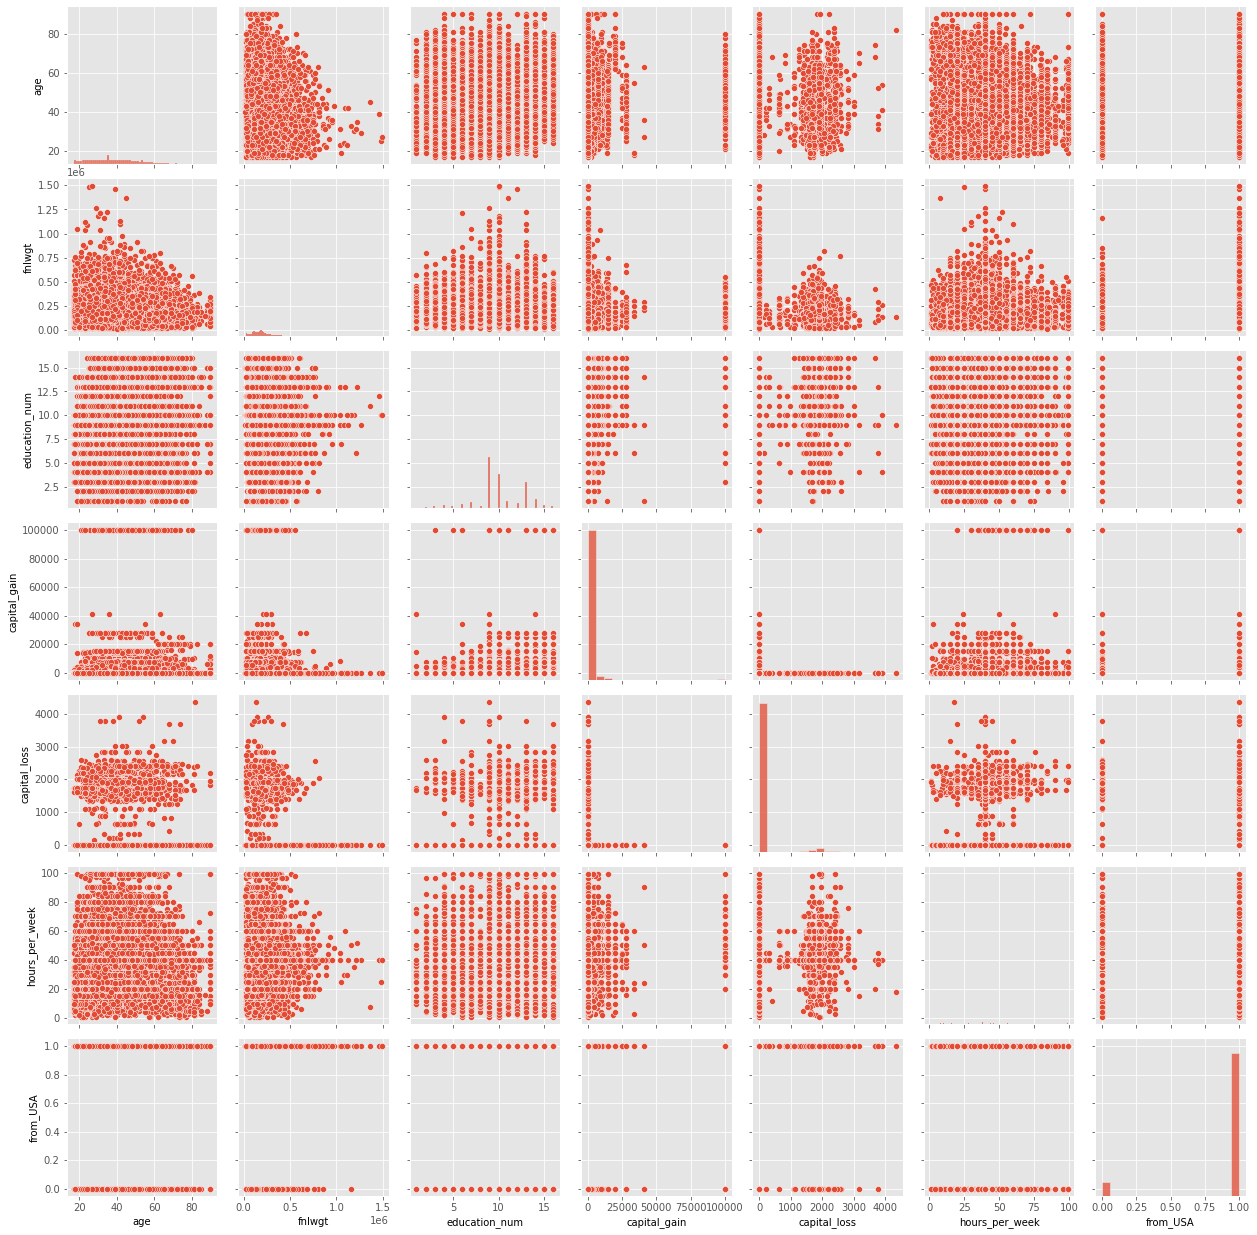

In [422]:
g = sns.PairGrid(df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

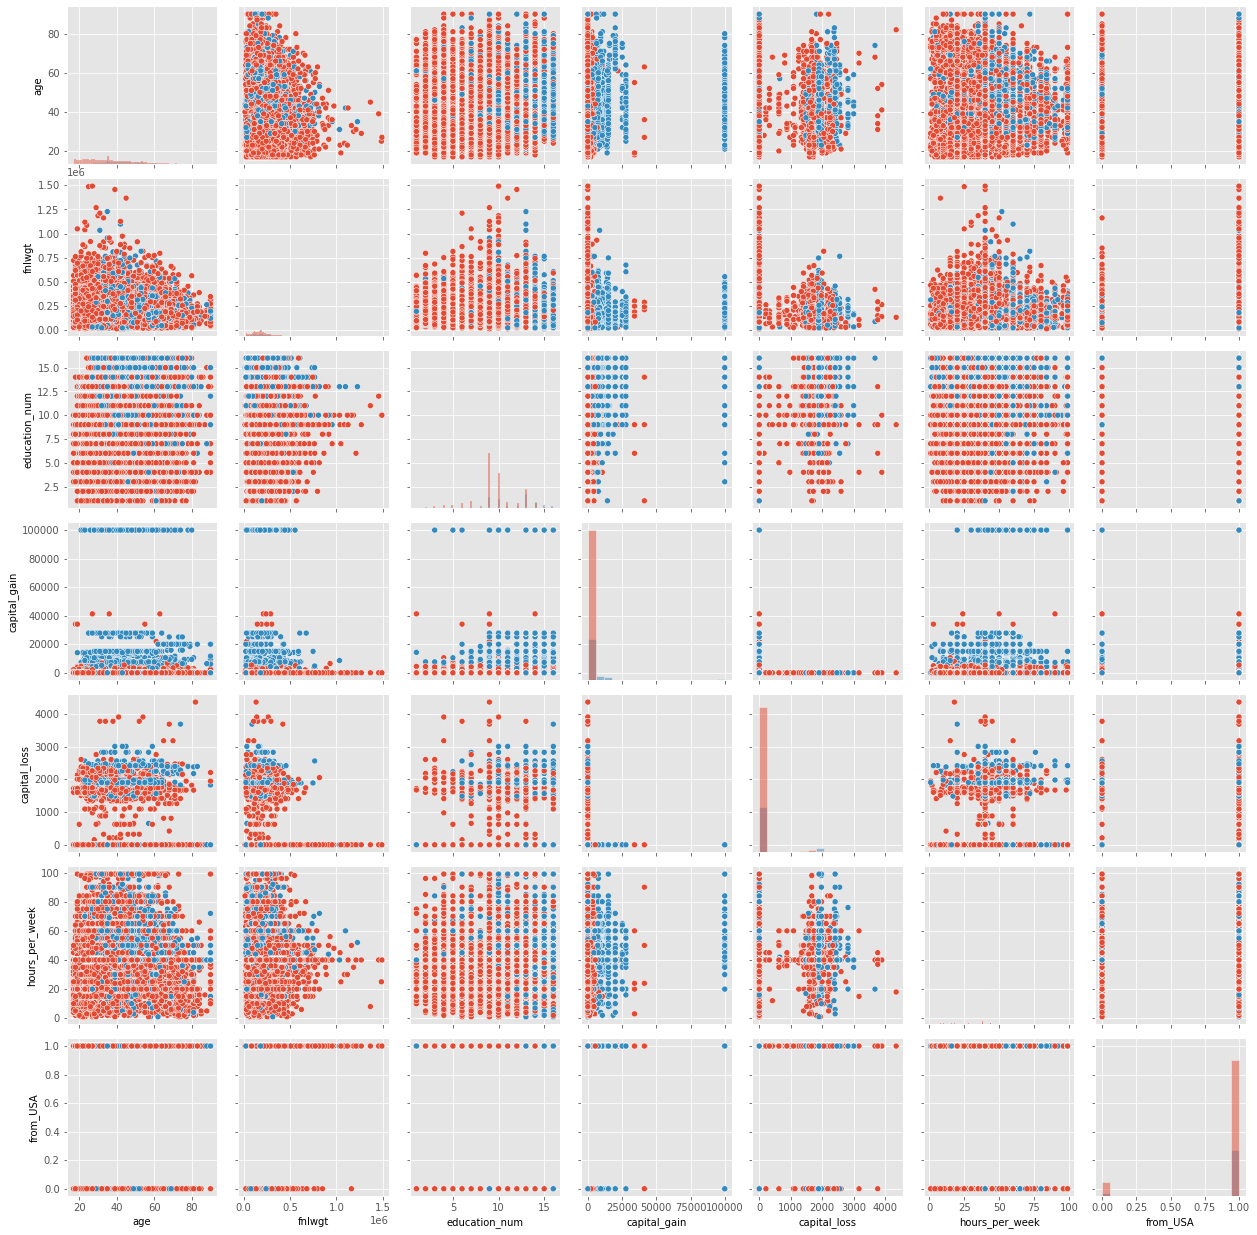

In [423]:
g = sns.PairGrid(df, hue='income')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

# Feature disctrubution by income 

In [100]:
df.groupby('income')['age'].count() / len(df)

income
<=50K    0.752167
>50K     0.247833
Name: age, dtype: float64

In [101]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'income', 'from_USA'],
      dtype='object')

In [28]:
cat_cols = ['workclass', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'from_USA']

In [103]:
num_dist_cols = ['age', 'hours_per_week', 'education_num']

In [104]:
num_cols = ['fnlwgt', 'capital_gain', 'capital_loss']

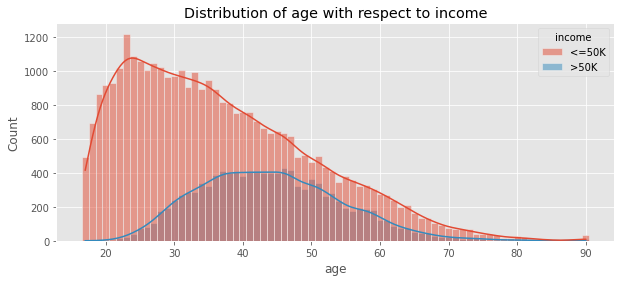

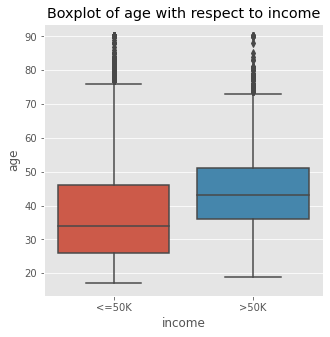

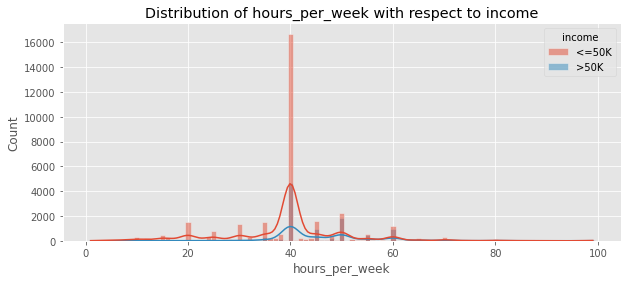

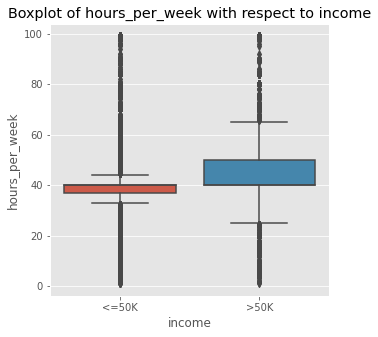

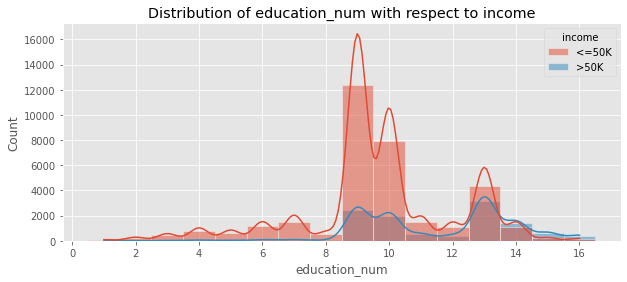

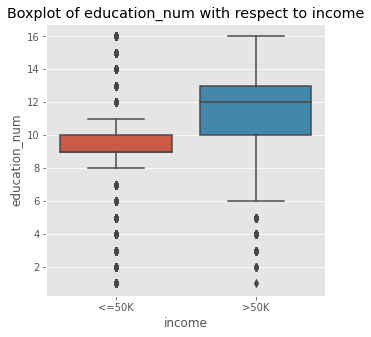

In [105]:
for col in num_dist_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(data=df, x=col, discrete=True, hue='income', kde=True)
    plt.title(f'Distribution of {col} with respect to income')
    plt.savefig(f'img/{col}_dist_by_target.pdf', bbox_inches='tight')
    plt.show()
    
    plt.figure(figsize=(5, 5))
    sns.boxplot(data=df, y=col, x='income')
    plt.title(f'Boxplot of {col} with respect to income')
    plt.savefig(f'img/{col}_box_by_target.pdf', bbox_inches='tight')

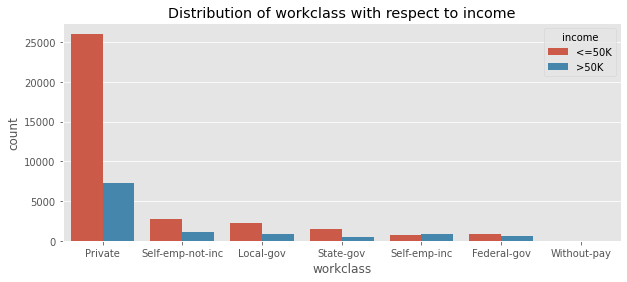

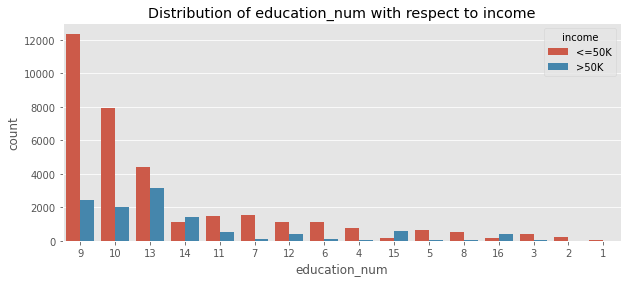

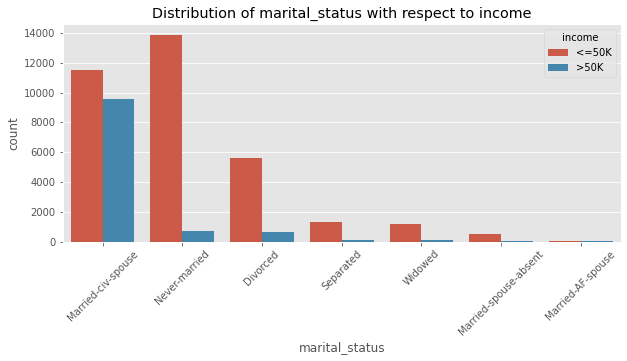

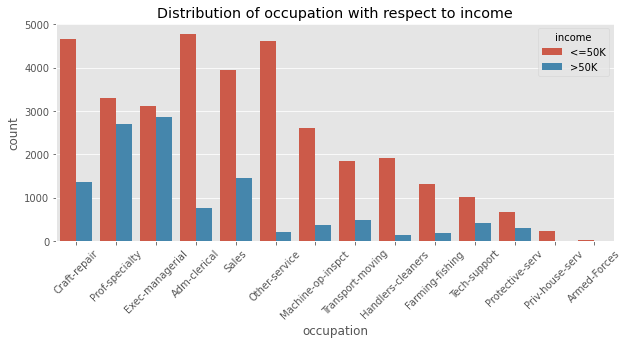

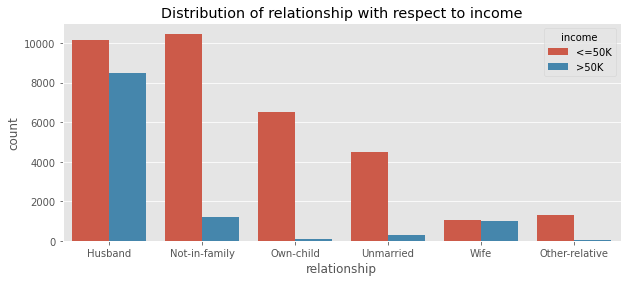

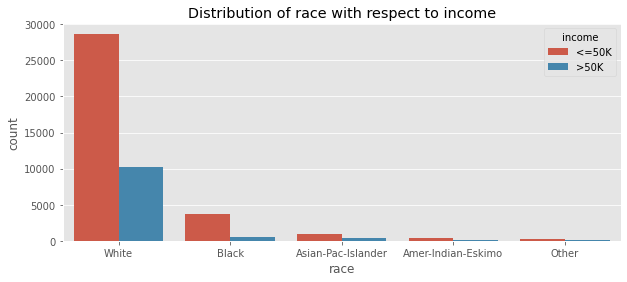

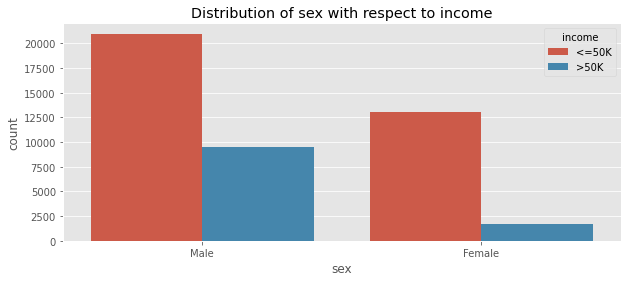

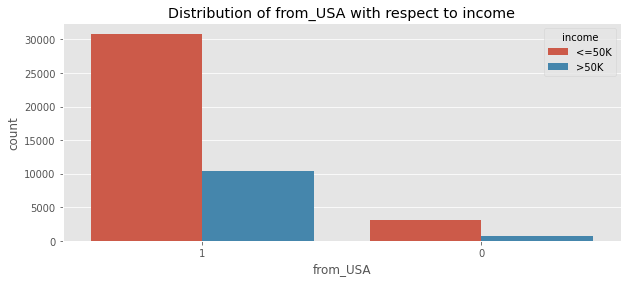

In [46]:
for col in cat_cols:
    plt.figure(figsize=(10, 4))
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue='income')
#     ax.bar_label(ax.containers[0])
    plt.title(f'Distribution of {col} with respect to income')
    if col == 'occupation' or col == 'education' or col == 'marital_status':
        plt.xticks(rotation=45)
    plt.savefig(f'img/{col}_dist_by_target.pdf', bbox_inches='tight')
    plt.show()

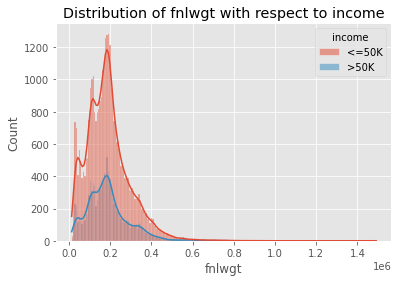

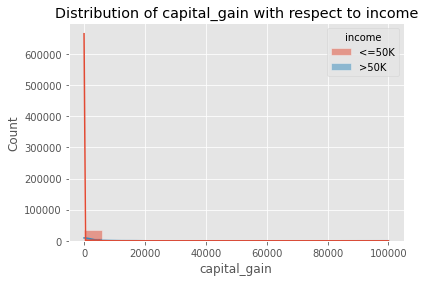

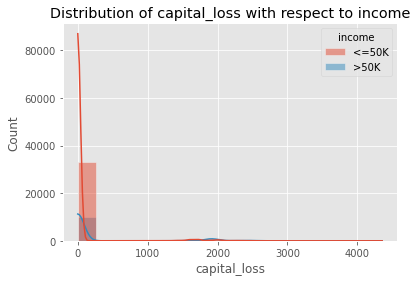

In [108]:
for fea in num_cols:
    plt.figure(figsize=(6, 4))
    ax = sns.histplot(data=df, x=fea, kde=True, hue='income')
    plt.title(f'Distribution of {fea} with respect to income')
    plt.savefig(f'img/{fea}_dist_by_target.pdf', bbox_inches='tight')
    plt.show()

In [430]:
df.to_csv('clean_adult.csv', index=False)